In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
#LOADING THE DATASET 

In [18]:
file_path = 'postings.csv'
df = pd.read_csv(file_path)

In [4]:
#DISPLAY THE FIRST 5 ROWS 

In [19]:
print(df.head())

     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                     NaN   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                     NaN   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech 

In [7]:
#CHECK FOR THE BASIC INFO 

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [9]:
#CHECK FOR THE MISSING VALUES 

In [21]:
print(df.isnull().sum())

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [11]:
#GET SUMMARY STATISTICS(FOR NUMERIC COLUMNS)

In [22]:
print(df.describe())

             job_id    max_salary    company_id          views     med_salary  \
count  1.238490e+05  2.979300e+04  1.221320e+05  122160.000000    6280.000000   
mean   3.896402e+09  9.193942e+04  1.220401e+07      14.618247   22015.619876   
std    8.404355e+07  7.011101e+05  2.554143e+07      85.903598   52255.873846   
min    9.217160e+05  1.000000e+00  1.009000e+03       1.000000       0.000000   
25%    3.894587e+09  4.828000e+01  1.435200e+04       3.000000      18.940000   
50%    3.901998e+09  8.000000e+04  2.269650e+05       4.000000      25.500000   
75%    3.904707e+09  1.400000e+05  8.047188e+06       8.000000    2510.500000   
max    3.906267e+09  1.200000e+08  1.034730e+08    9975.000000  750000.000000   

         min_salary       applies  original_listed_time  remote_allowed  \
count  2.979300e+04  23320.000000          1.238490e+05         15246.0   
mean   6.491085e+04     10.591981          1.713152e+12             1.0   
std    4.959738e+05     29.047395          4.

In [24]:
#DROP MISSING VALUES WHEREVER NECESSARY 

In [25]:
df = df.dropna(subset=['title', 'company_name'])

In [27]:
#FILL MISSING LOCATION WITH UNKNOWN 

In [29]:
df['location'] = df['location'].fillna('Unknown')

In [30]:
#FILL MISSING SALARIES WITH MEDIAN 

In [31]:
df['normalized_salary'] = df['normalized_salary'].fillna(df['normalized_salary'].median())

In [33]:
#FILL MISSING SKILLS DESCRIPTION WITH PLACEHOLDER 

In [34]:
df['skills_desc']= df['skills_desc'].fillna('No skills listed')

In [35]:
#FILL MISSING POSTING DOMAIN WITH UNKNOWN

In [36]:
df['posting_domain'] = df['posting_domain'].fillna('Unknown')

In [37]:
#TOP JOB TITLES BY FREQUENCY 

title
Sales Manager                      669
Customer Service Representative    364
Project Manager                    344
Senior Accountant                  235
Administrative Assistant           231
Executive Assistant                218
Registered Nurse                   204
Receptionist                       199
Staff Accountant                   196
Account Executive                  193
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Job Titles'}, ylabel='title'>

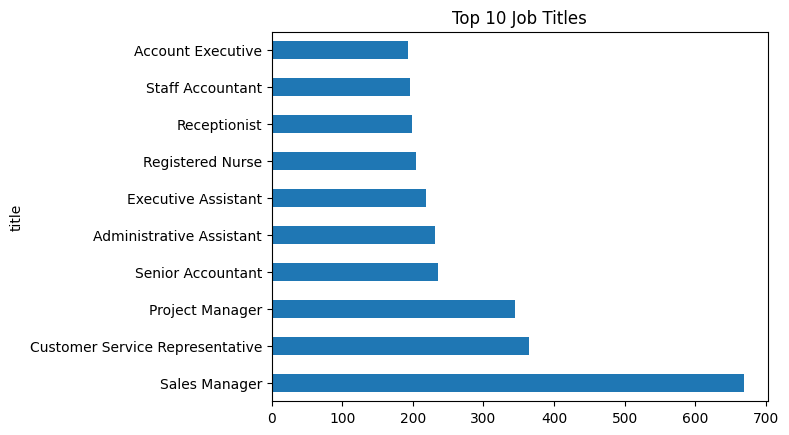

In [38]:
top_titles = df['title'].value_counts().head(10)
print(top_titles)
top_titles.plot(kind='barh',title='Top 10 Job Titles')

In [39]:
#The above analysis clearly shows that the highest number of job title the dataset has is of the Sales Manager.

In [40]:
#2. AVERAGE SALARY BY JOB TITLE 

title
Intellectual Property Associate (246215)                       535600000.0
Case Manager RN, Pedi Rheumatology                             362408800.0
Billing Supervisor (246521)                                    260000000.0
Manager - Clinical Applications Support - Ancillary Systems    230423440.0
Trial Paralegal - Hybrid in OC or LA!                          187200000.0
DCS Technician                                                 156000000.0
Cloud Domain Architect                                         143054837.5
Full Time Field Service Technician – Anaheim/Pomona Area       135200000.0
Sales Representative- Entry Level ($50k base + commission)     124800000.0
Technical Assistant - Employee Benefits                        107120000.0
Name: normalized_salary, dtype: float64


<Axes: title={'center': 'Highest Salary by Job Title'}, ylabel='title'>

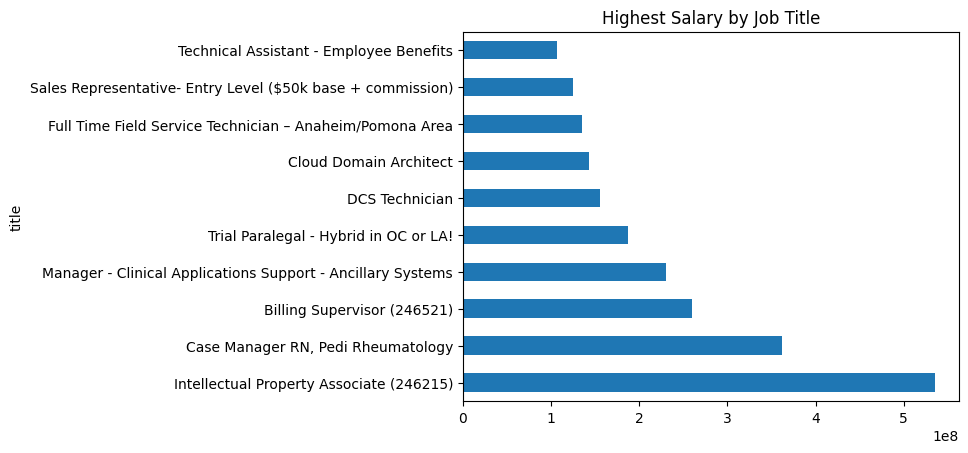

In [94]:
avg_salary_by_title = df.groupby('title')['normalized_salary'].mean().sort_values(ascending=False).head(10)
print(avg_salary_by_title)
avg_salary_by_title.plot(kind='barh', title='Highest Salary by Job Title')

In [42]:
#JOB POSTING BY LOCATIONS

location
United States    7847
New York, NY     2726
Chicago, IL      1815
Houston, TX      1740
Dallas, TX       1370
Atlanta, GA      1347
Boston, MA       1166
Austin, TX       1074
Charlotte, NC    1073
Phoenix, AZ      1040
Name: count, dtype: int64


<Axes: title={'center': 'Top Job Locations'}, xlabel='location'>

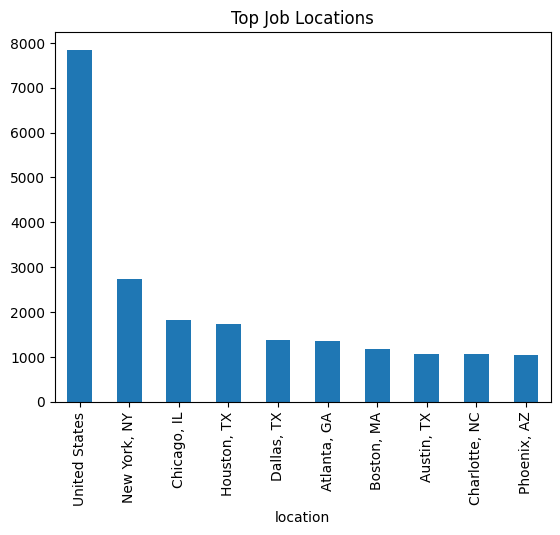

In [44]:
location_counts = df['location'].value_counts().head(10)
print(location_counts)
location_counts.plot(kind='bar',title='Top Job Locations')

In [45]:
#The above analysis cleary shows that the highest number of job postings are for the United States.

In [46]:
#FULL TIME VS. PART TIME JOBS

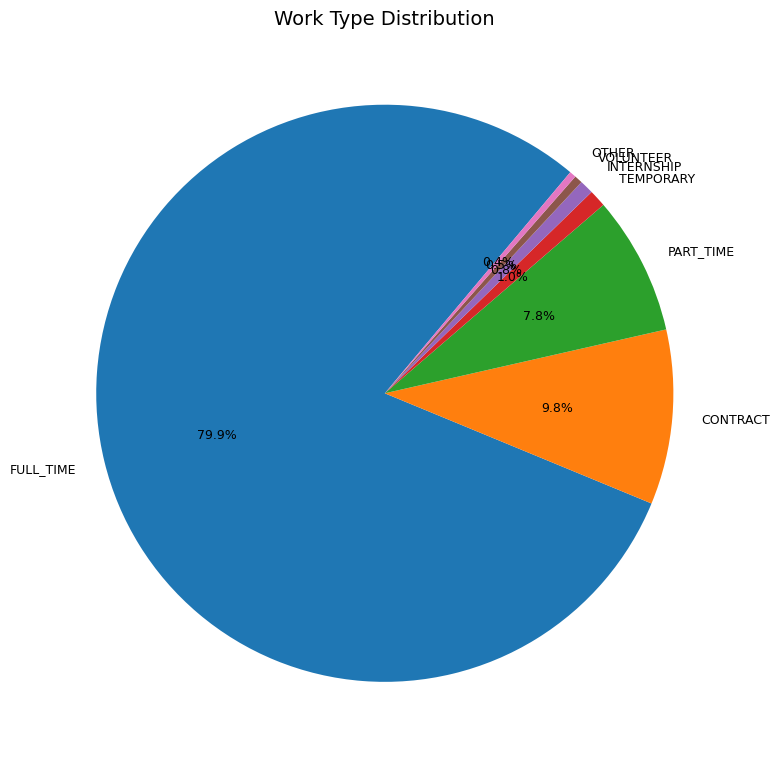

In [89]:


# Count values
counts = df['work_type'].value_counts()

# Basic pie chart with clearer layout
plt.figure(figsize=(8, 8))  # Bigger figure for more space
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.01f%%',
    textprops={'fontsize': 9},
    startangle=50
)
plt.title('Work Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()


In [90]:
#From the above analysis if we talk about Full time vs Part-Time jobs it is clear that the maximum number of jobs are Full time.

In [95]:
# SPONSORED VS NON-SPONSORED JOB SALARY 

<Axes: title={'center': 'Sponsored vs Non-Sponsored Salary'}, xlabel='sponsored'>

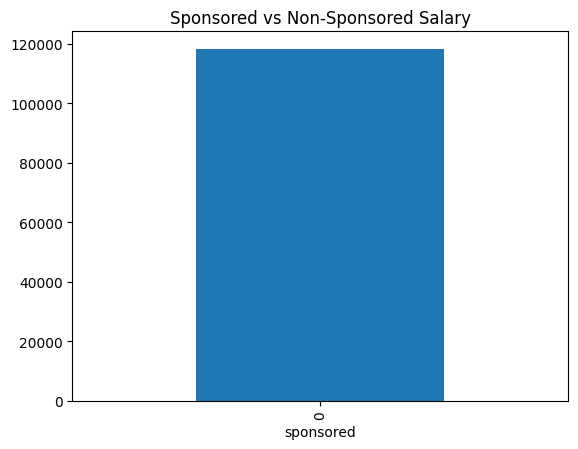

In [98]:
df.groupby('sponsored')['normalized_salary'].mean().plot(kind='bar', title='Sponsored vs Non-Sponsored Salary')

In [169]:
#The graph indicates that sponsored job listings have a significantly higher mean salary.

In [146]:
#Hourly vs Yearly Salary Comparison

<Axes: title={'center': 'Average Salary: Hourly vs Yearly'}, xlabel='pay_period'>

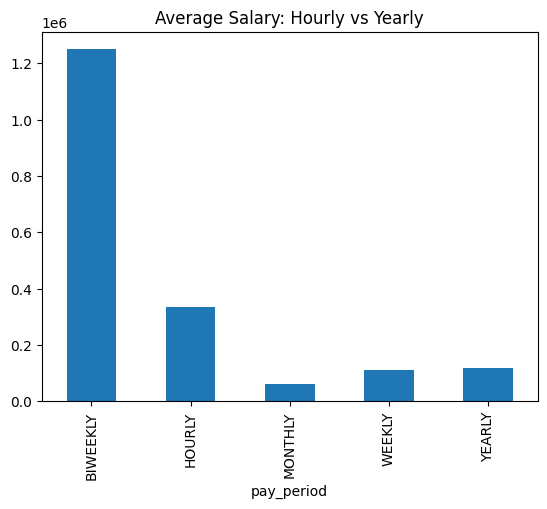

In [147]:
df.groupby('pay_period')['normalized_salary'].mean().plot(kind='bar', title='Average Salary: Hourly vs Yearly')

In [170]:
#It is evident that biweekly pay periods have the highest average salary,significantly exceeding the others.

In [148]:
# JOB DEMAND VS PAY
#Are jobs that pay more getting more attention?

<Axes: title={'center': 'Salary vs Views'}, xlabel='normalized_salary', ylabel='views'>

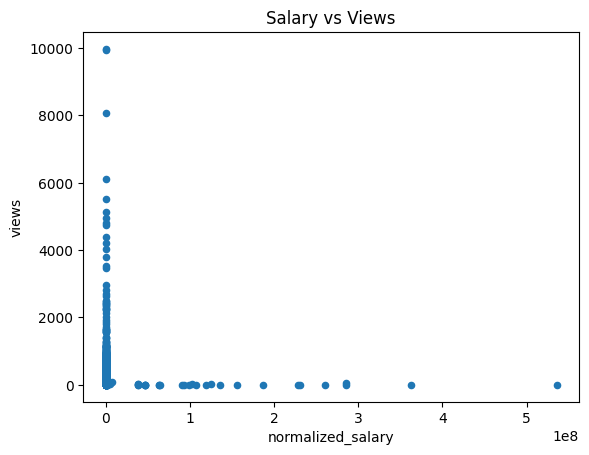

In [149]:
df.plot.scatter(x='normalized_salary', y='views', title='Salary vs Views')


In [171]:
#There are scattered data points with higher normalized salaries , but the number of views for these points is generally low,mostly below 2000

In [150]:
#SALARIES BY ZIP CODE 
#Where in the country are jobs paying the most?

<Axes: title={'center': 'Top Zip Codes by Salary'}, xlabel='zip_code'>

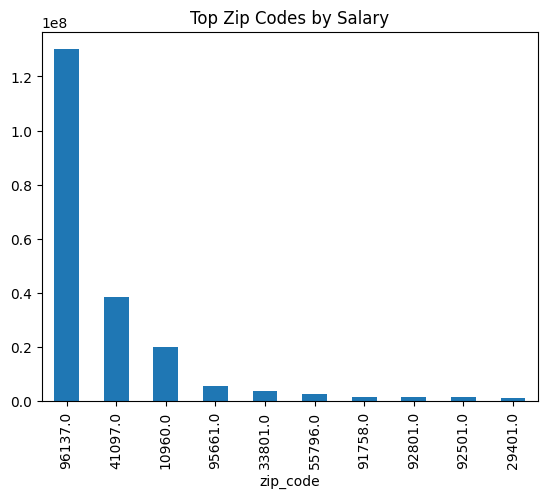

In [151]:
df.groupby('zip_code')['normalized_salary'].mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Top Zip Codes by Salary')

In [172]:
#This graph shows that the pin code 96137.0 has the highest normalized salary significantly higher than other zip code.

In [152]:
# COMPANY SIZE(POSTINGS) VS PAY
#Do companies that post more often pay more?

<Axes: title={'center': 'Avg Salary - Top Hiring Companies'}, ylabel='company_name'>

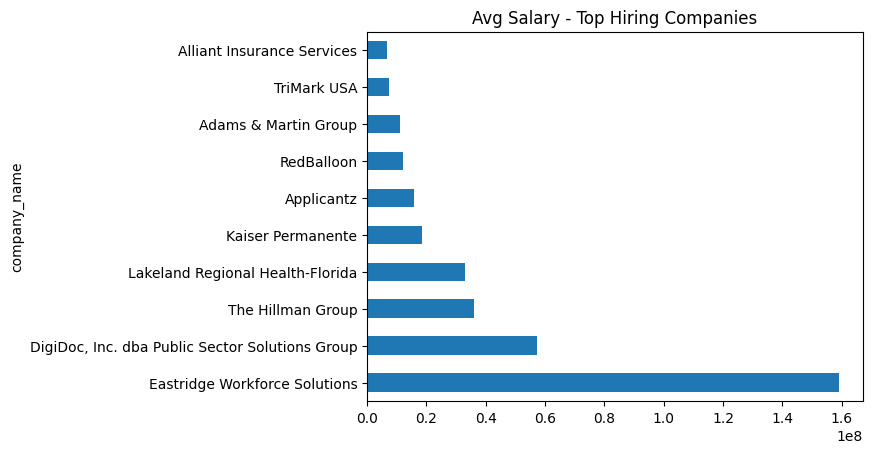

In [153]:
company_job_counts = df['company_name'].value_counts()
top_companies = df[df['company_name'].isin(company_job_counts[company_job_counts > 1].index)]
top_companies.groupby('company_name')['normalized_salary'].mean().sort_values(ascending=False).head(10).plot(kind='barh', title='Avg Salary - Top Hiring Companies')


In [173]:
#It could be possible that companies with higher turnover or rapid growth post more often and may or maynot pay more.

In [154]:
 #JOB LISTING OVER TIME
#Are postings increasing or dropping?

<Axes: title={'center': 'Weekly Job Listings Over Time'}, xlabel='date'>

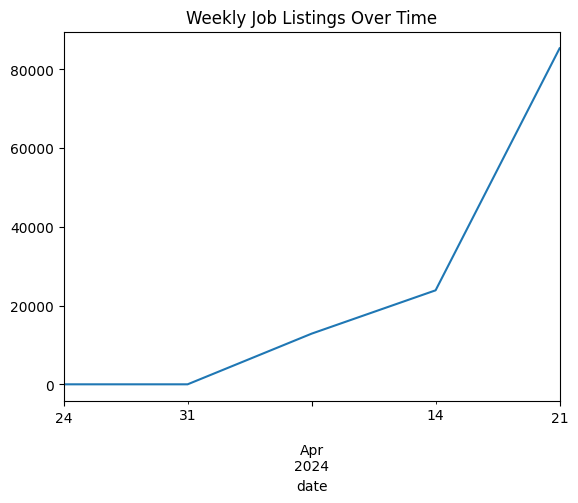

In [155]:
df['date'] = pd.to_datetime(df['listed_time'], unit='ms')
df.set_index('date').resample('W').size().plot(title='Weekly Job Listings Over Time')


In [174]:
#The graph indicates a significant increase in job listings between the end of April and Mid-April rising from a low point to over 80000 by April 21.

In [156]:
# MAX SALARY DISTRIBUTION
#Are most salaries low, mid, or high?

<Axes: title={'center': 'Salary Distribution'}, ylabel='Frequency'>

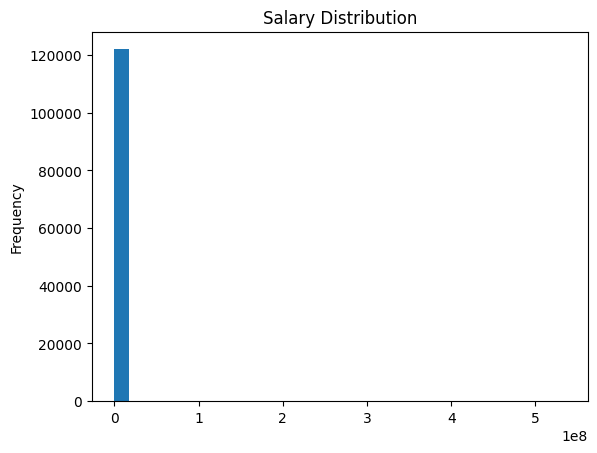

In [157]:
df['normalized_salary'].plot(kind='hist', bins=30, title='Salary Distribution')

In [175]:
#This indicates that within the dataset being analyzed, there's high concentration of salaries at around the value of 0 , with very few or no salaries at other values.

In [158]:
# SALARY RANGE SPREAD BY JOB TITLE 
# how much salary varies within the same role.

<Axes: title={'center': 'Top 10 Job Titles by Salary Range Spread'}, ylabel='title'>

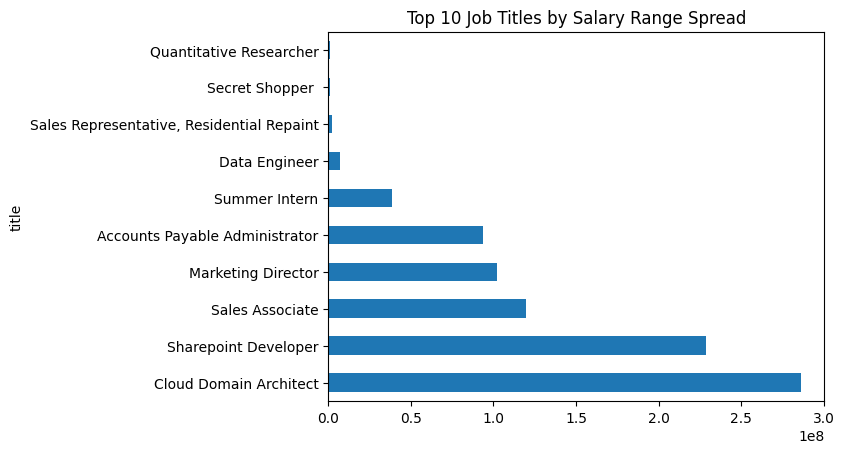

In [159]:
title_salary = df.groupby('title')['normalized_salary'].agg(['min', 'max'])
(title_salary['max'] - title_salary['min']).sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Job Titles by Salary Range Spread')


In [176]:
#This chart indicates that positions like Cloud Domain Architect and Sharepoint Developer have a wider range between the lowest and highest salaries compared to positions like Quantitative Researcher or Secret Shopper.

In [160]:
#Do Jobs Posted on Weekends Get Fewer Views?

<Axes: title={'center': 'Avg Views by Day Posted'}, xlabel='day_of_week'>

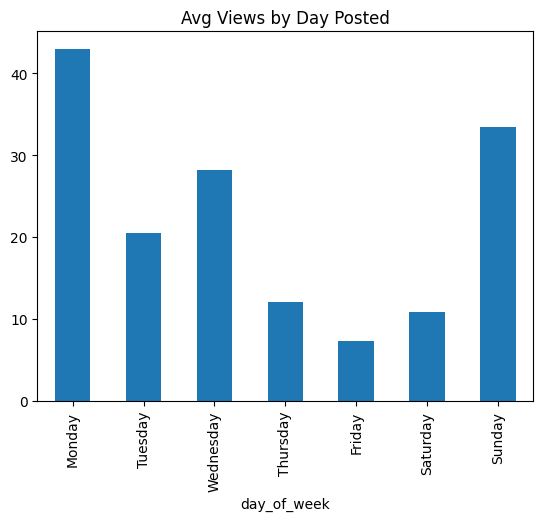

In [161]:
df['date'] = pd.to_datetime(df['listed_time'], unit='ms')
df['day_of_week'] = df['date'].dt.day_name()
df.groupby('day_of_week')['views'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', title='Avg Views by Day Posted')


In [177]:
#This chart indicates that the jobs posted on Monday get more views than the posted on other days.

In [162]:
#Job Description Length vs Salary
#Are longer descriptions more serious/senior jobs?

<Axes: title={'center': 'Description Length vs Salary'}, xlabel='desc_length', ylabel='normalized_salary'>

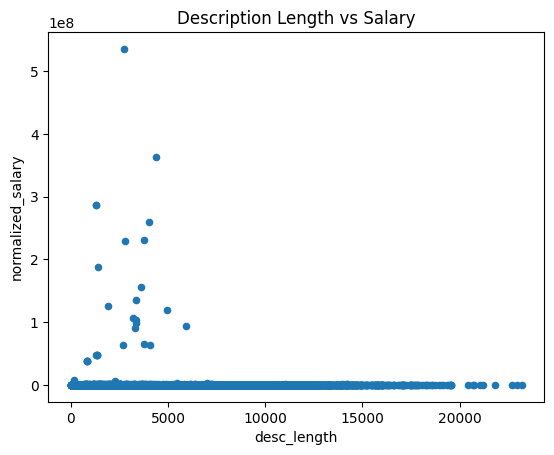

In [163]:
df['desc_length'] = df['description'].fillna('').str.len()
df.plot.scatter(x='desc_length', y='normalized_salary', title='Description Length vs Salary')

In [178]:
#this indicates a lack of strong correlation

In [164]:
# Does View Count Predict Salary?
#Check correlation and trend line.

<Axes: title={'center': 'Do More Views Mean Higher Pay?'}, xlabel='views', ylabel='normalized_salary'>

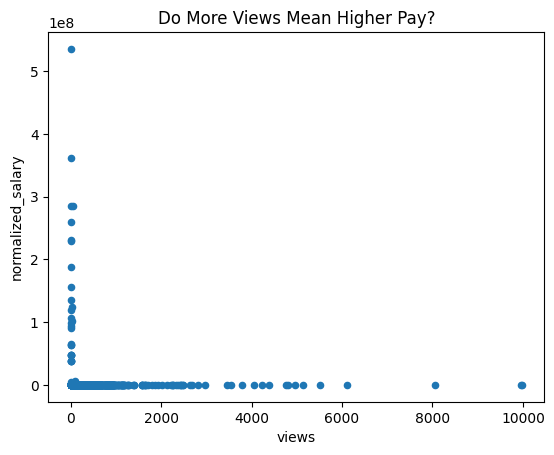

In [165]:
df[['views','normalized_salary']].dropna().plot(kind='scatter', x='views', y='normalized_salary', title='Do More Views Mean Higher Pay?' )

In [179]:
#The scatter plot suggests that the relationship between views and salary is complex and not directly proportional.

In [166]:
#Salary Prediction (Mini Model)
#Very basic model using views and desc_length just for demo

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['desc_length'] = df['description'].fillna('').str.len()
X = df[['views', 'desc_length']].fillna(0)
y = df['normalized_salary'].fillna(0)

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
print("Model Score:", model.score(X_test, y_test))


Model Score: -0.0011647800125413887
